#**OWL_EAGLE_CLASSIFIER**     

**by: Omar Farag**

###**About**

#### Just trying to apply CNN model for classification  problem 

#### The dataset was collected through googling randomly for owls and eagles images, then Image Downloader Extension was used to download the resulting of the search. So the data is not the perfect one to deal with and it is not predicted to reach a high accuracy due to the imperfections of the data.

### **Credits**

#### * Some code of this notebook back to the following:
#####   https://www.kaggle.com/uysimty/keras-cnn-dog-or-cat-classification
##### You are so welcome to add your comments and edits.

### List of Contents
* 1. Importing Libraries
* 2. Loading and Exploring the Data
* 3. Preparing the data
* 4. Building the Model
* 5. Fitting the Model
* 6. Saving the model
* 7. Prediction
* 8. Saving the predictions 

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from os import listdir
from os.path import isfile, join

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.optimizers import Adam



### Loading and Exploring the Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# detect the current working directory and print it
path = os.getcwd()
print ("The current working directory is %s" % path)

The current working directory is /content


In [5]:
listdir(path)

['.config', 'drive', 'sample_data']

In [6]:
a= join(path,'drive')
listdir(a)
b=join(a,'My Drive')
listdir(b)
images_path=join(b,'all_img_') 

In [7]:
img={}
for i in listdir(images_path):
    m= join(images_path,i)
    img[m]=i.split('_')[0]

In [8]:
df = pd.DataFrame(list(img.items()),columns = ['img','class']) 

In [9]:
from sklearn.utils import shuffle

df= shuffle(df)

In [10]:
df.head(10)

,img,class
26,/content/drive/My Drive/all_img_/eagle_15.jpg,eagle
334,/content/drive/My Drive/all_img_/owl_80.jpg,owl
298,/content/drive/My Drive/all_img_/owl_49.jpg,owl
201,/content/drive/My Drive/all_img_/eagle_229.jpg,eagle
135,/content/drive/My Drive/all_img_/eagle_163.jpg,eagle
310,/content/drive/My Drive/all_img_/owl_65.jpg,owl
195,/content/drive/My Drive/all_img_/eagle_196.jpg,eagle
309,/content/drive/My Drive/all_img_/owl_57.jpg,owl
219,/content/drive/My Drive/all_img_/eagle_227.jpg,eagle
466,/content/drive/My Drive/all_img_/owl_229.jpg,owl


In [11]:
df['class'].value_counts()

owl      241
eagle    241
Name: class, dtype: int64

** We Have 241 images for owls  and the same number for eagle

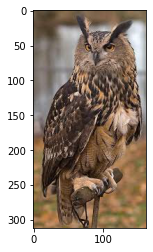

In [12]:
sample = random.choice(df['img'])
image = load_img(sample)
plt.imshow(image)

In [13]:
len(df['img'])

482

### Preparing the data

In [14]:
train_df, test_df = train_test_split(df, test_size=0.20, random_state=42)
train_df,val_df= train_test_split(train_df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

In [15]:
print (len (train_df))
print (len (test_df))
print (len (val_df))

308
97
77


In [16]:
batch_size=15

In [17]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    images_path,
    x_col='img',
    y_col='class',
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=batch_size
)

Found 308 validated image filenames belonging to 2 classes.


In [18]:
test_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    images_path, 
    x_col='img',
    y_col='class',
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=batch_size
)

Found 97 validated image filenames belonging to 2 classes.


In [19]:
val_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    images_path, 
    x_col='img',
    y_col='class',
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=batch_size
)

Found 77 validated image filenames belonging to 2 classes.


##### See how our generator work



In [20]:
row= train_df[0:1]

simple_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

example_generator = simple_datagen.flow_from_dataframe(
    row,
    images_path, 
    x_col='img',
    y_col='class',
    target_size=(150, 150),
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


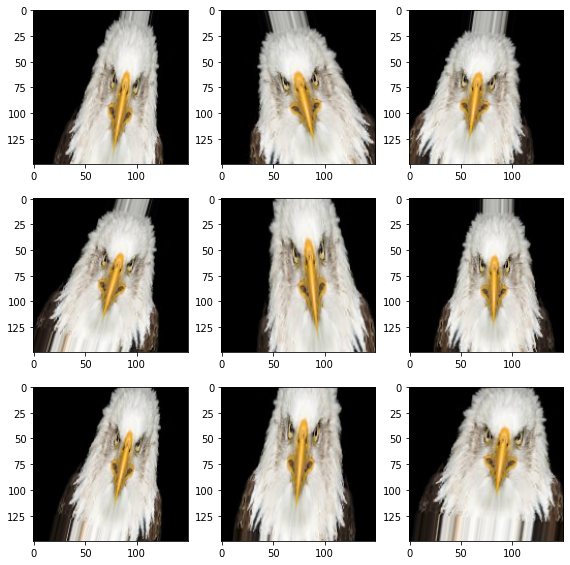

In [21]:
plt.figure(figsize=(8, 8))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

###### show some images

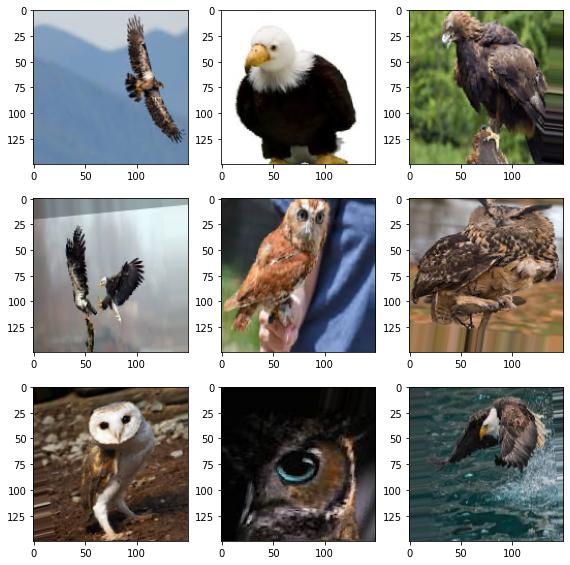

In [22]:
plt.figure(figsize=(8, 8))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

## Building the model

In [23]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes


LR = 1e-4
epochs=15

opt = Adam(lr=LR, decay=LR / epochs)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

## Fitting the  Model

In [24]:
history = model.fit_generator(
    train_generator, 
    epochs=20,
    validation_data=val_generator,
    validation_steps=len(val_df)//batch_size,
    steps_per_epoch=len(train_df)//batch_size,
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
20/20 [==============================] - 70s 3s/step - loss: 0.6974 - accuracy: 0.4933 - val_loss: 0.6932 - val_accuracy: 0.4533
Epoch 2/20
20/20 [==============================] - 2s 121ms/step - loss: 0.6829 - accuracy: 0.5495 - val_loss: 0.6754 - val_accuracy: 0.5867
Epoch 3/20
20/20 [==============================] - 2s 114ms/step - loss: 0.6645 - accuracy: 0.6348 - val_loss: 0.6475 - val_accuracy: 0.6800
Epoch 4/20
20/20 [==============================] - 2s 115ms/step - loss: 0.6261 - accuracy: 0.6587 - val_loss: 0.6694 - val_accuracy: 0.6400
Epoch 5/20
20/20 [==============================] - 2s 115ms/step - loss: 0.6056 - accuracy: 0.6655 - val_loss: 0.6125 - val_accuracy: 0.6667
Epoch 6/20
20/20 [==============================] - 2s 113ms/step - loss: 0.5709 - accuracy: 0.7065 - val_loss: 0.5800 - val_accuracy: 0.7200
Epoch 7/20
20/20 [==============================] - 2s 116ms/step - loss: 

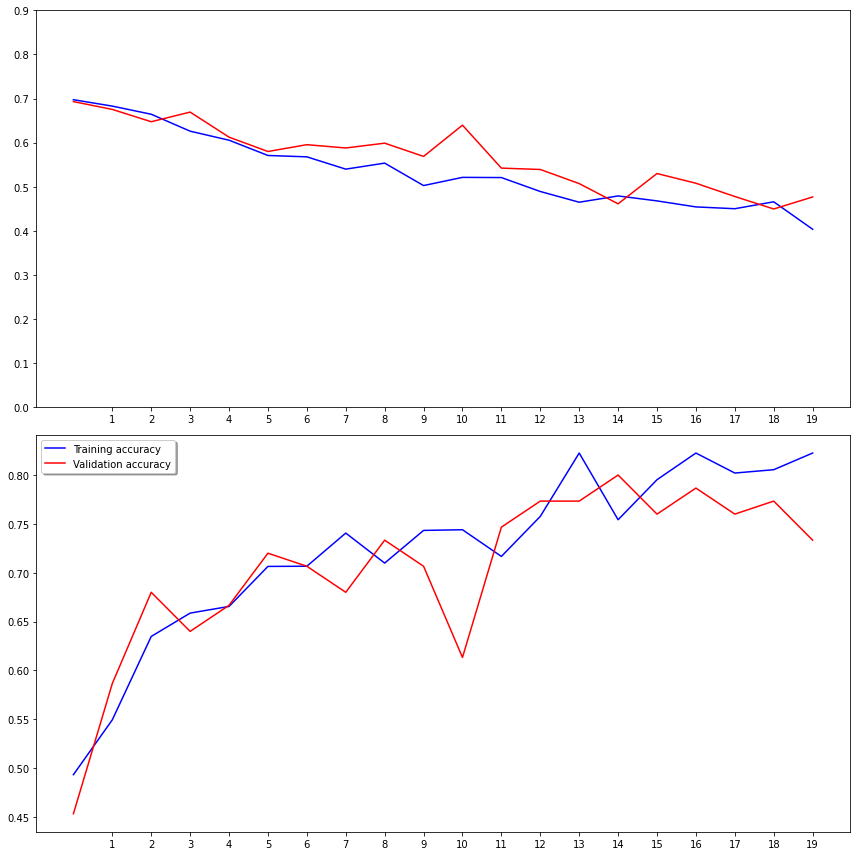

In [35]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 20, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 20, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

### Saving the Model

In [26]:
model.save_weights("model.h5")

### Prediction

In [27]:
predict = model.predict_generator(test_generator, steps=np.ceil(len(test_df)/batch_size))

Instructions for updating:
Please use Model.predict, which supports generators.


In [28]:
test_df['category'] = np.argmax(np.zeros, axis=-1)

In [29]:
test_df['category'] = np.argmax(predict, axis=-1)

In [30]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [31]:
test_df['class'].value_counts()

eagle    51
owl      46
Name: class, dtype: int64

In [32]:
test_df['category'].value_counts()

eagle    50
owl      47
Name: category, dtype: int64

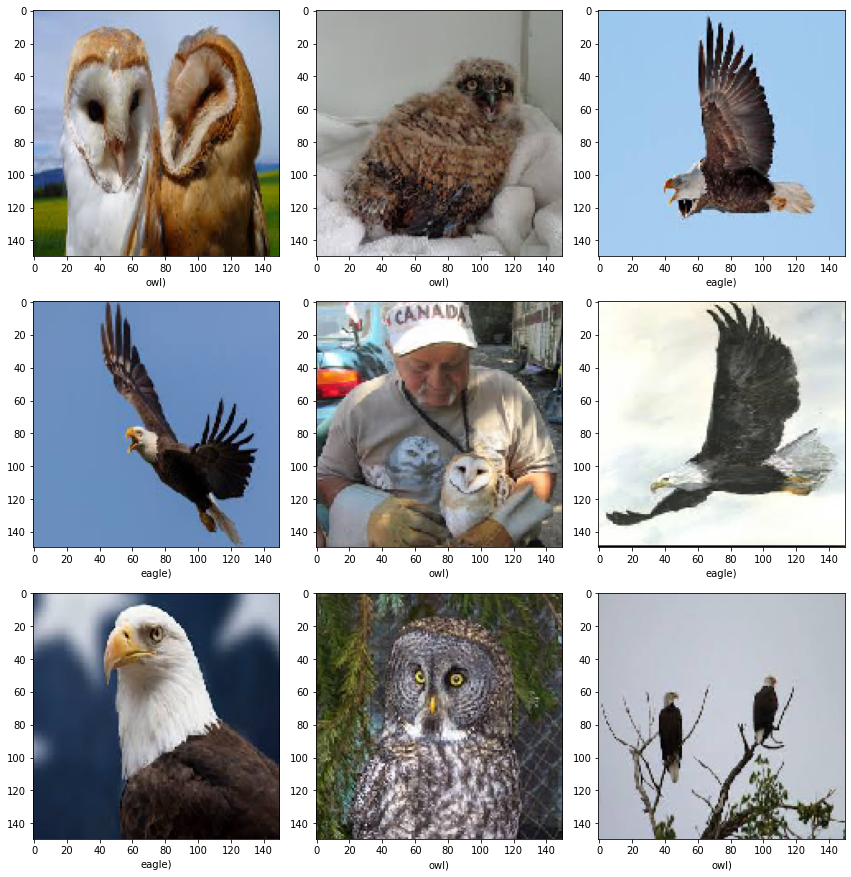

In [33]:
sample_test = test_df.head(9)

plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['img']
    category = row['category']
    img = load_img(filename, target_size=(150,150))
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel("{}".format(category) + ')' )
plt.tight_layout()
plt.show()

### Saving the Predictions

In [34]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['img']
submission_df['label'] = submission_df['category']
submission_df.drop(['img', 'category','class'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)